In [114]:
import pandas as pd
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
data=pd.read_csv("cafesales.csv")

In [ ]:
data.head(15)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [ ]:
data_backup = data.copy()

In [ ]:
data = data.replace(["ERROR", "UNKNOWN", ""], np.nan)

In [ ]:
data["Quantity"].isin(["ERROR", "UNKNOWN"," "]).sum()

np.int64(0)

In [ ]:
data["Price Per Unit"].isin(["ERROR","UNKNOWN"," "]).sum()

np.int64(0)

In [ ]:
data["Item"].isin(["ERROR","UNKNOWN"," "]).sum()

np.int64(0)

In [ ]:
data['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', nan, 'Sandwich',
       'Juice', 'Tea'], dtype=object)

In [ ]:
data.head(25)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [ ]:
data.loc[data['Item'] == 'Coffee', 'Price Per Unit']=2
data.loc[data['Item'] == 'Cookie', 'Price Per Unit']=1
data.loc[data['Item'] == 'Salad' , 'Price Per Unit']=5
data.loc[data['Item'] == 'Tea'   , 'Price Per Unit']=1.5
data.loc[data['Item'] == 'Cake'  , 'Price Per Unit']=3
data.loc[data['Item'] == 'Smoothie','Price Per Unit']=4
data.loc[data['Item'] == 'Sandwich', 'Price Per Unit']=4
data.loc[data['Item'] == 'Juice'  , 'Price Per Unit']=3

In [ ]:
data['Price Per Unit'].isna().sum()

np.int64(54)

In [ ]:
data['Price Per Unit'] = pd.to_numeric(data['Price Per Unit'], errors='coerce')

In [ ]:
data.head(5)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [ ]:
data.loc[data['Price Per Unit'] ==2.0, 'Item']='Coffee'

In [ ]:
data.loc[data['Price Per Unit'] ==1.0, 'Item']='Cookie'

In [ ]:
data.loc[data['Price Per Unit'] ==1.5, 'Item']='Tea'

In [ ]:
data.loc[data['Price Per Unit'] ==5.0, 'Item']='Salad'

In [ ]:
data.head(15)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [ ]:
data['Price Per Unit'].isna().sum()

np.int64(54)

In [ ]:
data.head(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [ ]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')


In [ ]:
data.head(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3.0,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31


In [ ]:
data['Quantity'].isna().sum()

np.int64(479)

In [ ]:
data['Quantity'] = data['Quantity'].replace(["UNKNOWN", "ERROR"], np.nan)

In [ ]:
data['Quantity'].isna().sum()

np.int64(479)

In [ ]:
data['Quantity'] = data['Quantity'].astype(float)

In [ ]:
CoffeeQuantity_mean = round(data.loc[data['Item'] == 'Coffee', 'Quantity'].mean())

In [ ]:
data.loc[(data['Item'] == 'Coffee') & (data['Quantity'].isna()), 'Quantity'] = CoffeeQuantity_mean

In [ ]:
CakeQuantity_mean = round(data.loc[data['Item'] == 'Cake', 'Quantity'].mean())

In [ ]:
data.loc[(data['Item'] == 'Cake') & (data['Quantity'].isna()), 'Quantity'] = CakeQuantity_mean

In [ ]:
CookieQuantity_mean = round(data.loc[data['Item'] == 'Cookie', 'Quantity'].mean())

In [ ]:
data.loc[(data['Item'] == 'Cookie') & (data['Quantity'].isna()), 'Quantity'] = CookieQuantity_mean

In [ ]:
TeaQuantity_mean = round(data.loc[data['Item'] == 'Tea', 'Quantity'].mean())

In [ ]:
data.loc[(data['Item'] == 'Tea') & (data['Quantity'].isna()), 'Quantity'] = TeaQuantity_mean

In [ ]:
SandwichQuantity_mean = round(data.loc[data['Item'] == 'Sandwich', 'Quantity'].mean())

In [ ]:
data.loc[(data['Item'] == 'Sandwich') & (data['Quantity'].isna()), 'Quantity'] = SandwichQuantity_mean

In [ ]:
SmoothieQuantity_mean = round(data.loc[data['Item'] == 'Smoothie', 'Quantity'].mean())

In [ ]:
data.loc[(data['Item'] == 'Smoothie') & (data['Quantity'].isna()), 'Quantity'] = SmoothieQuantity_mean

In [ ]:
JuiceQuantity_mean = round(data.loc[data['Item'] == 'Juice', 'Quantity'].mean())

In [ ]:
data.loc[(data['Item'] == 'Juice') & (data['Quantity'].isna()), 'Quantity'] = JuiceQuantity_mean

In [ ]:
SaladQuantity_mean = round(data.loc[data['Item'] == 'Salad', 'Quantity'].mean())

In [ ]:
data.loc[(data['Item'] == 'Salad') & (data['Quantity'].isna()), 'Quantity'] = SaladQuantity_mean

In [ ]:
data[data['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6,TXN_4433211,NaN,3.0,3.0,9.0,NaN,Takeaway,2023-10-06
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
36,TXN_6855453,NaN,4.0,3.0,12.0,NaN,In-store,2023-07-17
61,TXN_8051289,NaN,1.0,3.0,3.0,NaN,In-store,2023-10-09
69,TXN_8471743,NaN,5.0,3.0,15.0,Digital Wallet,In-store,2023-04-06
...,...,...,...,...,...,...,...,...
9918,TXN_2292088,NaN,1.0,4.0,4.0,Digital Wallet,Takeaway,2023-03-04
9946,TXN_8807600,NaN,1.0,4.0,4.0,Cash,Takeaway,2023-09-24
9981,TXN_4583012,NaN,5.0,4.0,20.0,Digital Wallet,NaN,2023-02-27
9994,TXN_7851634,NaN,4.0,4.0,16.0,NaN,NaN,2023-01-08


In [ ]:
data = data.dropna(subset=['Quantity'])


In [ ]:
data.head(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3.0,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31


In [ ]:
data[data['Price Per Unit'] == 3.0]['Item'].value_counts()

,count
Item,
Juice,1171
Cake,1139


In [ ]:
dist = data[(data['Price Per Unit'] == 3.0) & (data['Item'].notna())]['Item'].value_counts(normalize=True)
print(dist)


Item
Juice    0.506926
Cake     0.493074
Name: proportion, dtype: float64


In [ ]:
mask = (data['Price Per Unit'] == 3.0) & (data['Item'].isna())

data.loc[mask, 'Item'] = np.random.choice(
    dist.index,                        # ['Juice', 'Cake']
    size=mask.sum(),                   # kaç tane nan varsa
    p=dist.values                      # oranlara göre dağıt
)


In [ ]:
dist1 = data[(data['Price Per Unit'] == 4.0) & (data['Item'].notna())]['Item'].value_counts(normalize=True)
print(dist1)


Item
Sandwich    0.507858
Smoothie    0.492142
Name: proportion, dtype: float64


In [ ]:
mask1 = (data['Price Per Unit'] == 4.0) & (data['Item'].isna())

data.loc[mask1, 'Item'] = np.random.choice(
    dist1.index,                        # ['Juice', 'Cake']
    size=mask1.sum(),                   # kaç tane nan varsa
    p=dist1.values                      # oranlara göre dağıt
)


In [ ]:
data[data['Total Spent'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
25,TXN_7958992,Smoothie,3.0,4.0,NaN,NaN,NaN,2023-12-13
31,TXN_8927252,Cookie,2.0,1.0,NaN,Credit Card,NaN,2023-11-06
42,TXN_6650263,Tea,2.0,1.5,NaN,NaN,Takeaway,2023-01-10
65,TXN_4987129,Sandwich,3.0,4.0,NaN,NaN,In-store,2023-10-20
...,...,...,...,...,...,...,...,...
9893,TXN_3809533,Juice,2.0,3.0,NaN,Digital Wallet,Takeaway,2023-02-02
9954,TXN_1191659,Coffee,4.0,2.0,NaN,Credit Card,In-store,2023-11-21
9977,TXN_5548914,Juice,2.0,3.0,NaN,Digital Wallet,In-store,2023-11-04
9988,TXN_9594133,Cake,5.0,3.0,NaN,NaN,NaN,NaN


In [ ]:
data=data.dropna(subset=['Item', 'Price Per Unit', 'Total Spent'], how='all')

In [ ]:
print(data['Total Spent'].dtype)

object


In [ ]:
data['Total Spent'] = pd.to_numeric(data['Total Spent'], errors='coerce')

In [ ]:
mask2 = data['Quantity'].notna() & data['Price Per Unit'].notna()
data.loc[mask2, 'Total Spent'] = data.loc[mask2, 'Quantity'] * data.loc[mask2, 'Price Per Unit']

In [ ]:
mask3 = data['Quantity'].notna() & data['Total Spent'].notna()
data.loc[mask3, 'Price Per Unit'] = data.loc[mask3, 'Total Spent'] / data.loc[mask3, 'Quantity']

In [ ]:
data[data['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
118,TXN_4633784,NaN,5.0,3.0,15.0,NaN,In-store,2023-02-06
151,TXN_4031509,NaN,4.0,4.0,16.0,Credit Card,Takeaway,2023-01-04
289,TXN_3495950,NaN,4.0,1.5,6.0,Credit Card,In-store,2023-02-19
334,TXN_2523298,NaN,4.0,1.5,6.0,NaN,In-store,2023-03-25
550,TXN_4186681,NaN,4.0,1.5,6.0,Digital Wallet,NaN,2023-05-24
750,TXN_5787508,NaN,3.0,3.0,9.0,Credit Card,Takeaway,2023-07-23
818,TXN_7940202,NaN,1.0,4.0,4.0,Digital Wallet,NaN,2023-07-23
1154,TXN_2473090,NaN,2.0,1.5,3.0,Credit Card,In-store,2023-03-03
1337,TXN_5031214,NaN,5.0,1.0,5.0,NaN,Takeaway,2023-07-29
1377,TXN_8396271,NaN,2.0,1.0,2.0,NaN,NaN,2023-09-12


In [ ]:
data.loc[data['Price Per Unit'] == 2.0, 'Item']='Coffee'
data.loc[data['Price Per Unit'] == 1.0, 'Item']='Cookie'
data.loc[data['Price Per Unit'] == 5.0 , 'Item']='Salad'
data.loc[data['Price Per Unit'] == 1.5 , 'Item']='Tea'


In [ ]:
data[data['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
118,TXN_4633784,NaN,5.0,3.0,15.0,NaN,In-store,2023-02-06
151,TXN_4031509,NaN,4.0,4.0,16.0,Credit Card,Takeaway,2023-01-04
750,TXN_5787508,NaN,3.0,3.0,9.0,Credit Card,Takeaway,2023-07-23
818,TXN_7940202,NaN,1.0,4.0,4.0,Digital Wallet,NaN,2023-07-23
2227,TXN_3200203,NaN,2.0,4.0,8.0,NaN,NaN,2023-12-04
2596,TXN_4844386,NaN,5.0,3.0,15.0,Credit Card,In-store,2023-10-28
2610,TXN_8266689,NaN,5.0,3.0,15.0,Cash,In-store,2023-12-03
2962,TXN_9702662,NaN,4.0,4.0,16.0,NaN,Takeaway,2023-07-10
3013,TXN_1842697,NaN,5.0,3.0,15.0,NaN,NaN,2023-10-25
3434,TXN_6457997,NaN,1.0,4.0,4.0,Credit Card,NaN,2023-12-12


In [ ]:
dist2 = data[(data['Price Per Unit'] == 3.0) & (data['Item'].notna())]['Item'].value_counts(normalize=True)
print(dist2)


Item
Juice    0.510445
Cake     0.489555
Name: proportion, dtype: float64


In [ ]:
mask4 = (data['Price Per Unit'] == 3.0) & (data['Item'].isna())

data.loc[mask4, 'Item'] = np.random.choice(
    dist2.index,                        # ['Juice', 'Cake']
    size=mask4.sum(),                   # kaç tane nan varsa
    p=dist2.values                      # oranlara göre dağıt
)


In [ ]:
dist3 = data[(data['Price Per Unit'] == 4.0) & (data['Item'].notna())]['Item'].value_counts(normalize=True)
print(dist3)


Item
Sandwich    0.505572
Smoothie    0.494428
Name: proportion, dtype: float64


In [ ]:
mask5 = (data['Price Per Unit'] == 4.0) & (data['Item'].isna())

data.loc[mask5, 'Item'] = np.random.choice(
    dist3.index,                        # ['Juice', 'Cake']
    size=mask5.sum(),                   # kaç tane nan varsa
    p=dist3.values                      # oranlara göre dağıt
)


In [ ]:
data.isna().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,3167
Location,3949
Transaction Date,457


In [ ]:
data.head(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,Cake,3.0,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,Cake,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31


In [ ]:
data['Payment Method'].value_counts()

,count
Payment Method,
Digital Wallet,2283
Credit Card,2267
Cash,2253


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

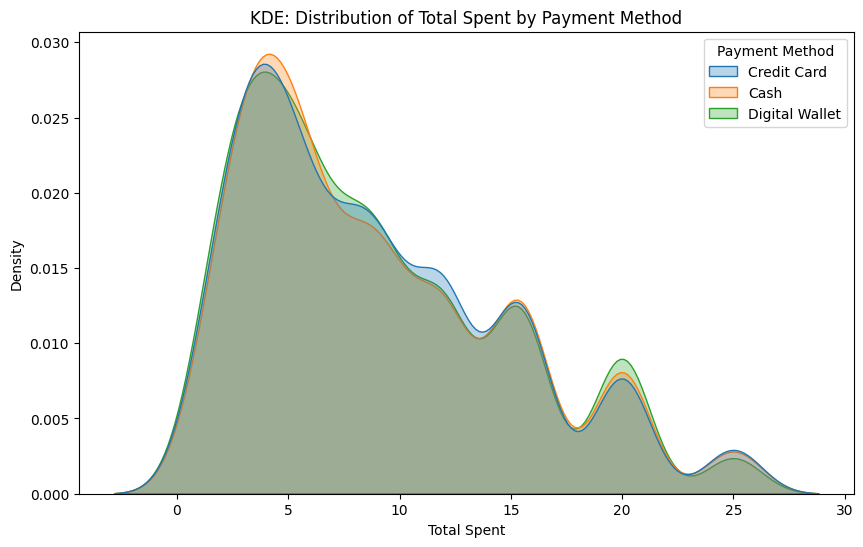

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='Total Spent', hue='Payment Method', fill=True, alpha=0.3)
plt.title("KDE: Distribution of Total Spent by Payment Method")
plt.show()

In [ ]:
paymentMethod0_8 = data[(data['Total Spent'] >= 0) & (data['Total Spent'] <= 8) & data['Payment Method'].notna()]

payment_dist_low1 = paymentMethod0_8['Payment Method'].value_counts(normalize=True)
print(payment_dist_low1)

Payment Method
Digital Wallet    0.338662
Credit Card       0.332268
Cash              0.329070
Name: proportion, dtype: float64


In [ ]:
def fill_payment_low(row, probs):
    if pd.notna(row['Payment Method']):
        return row['Payment Method']

    if 0 <= row['Total Spent'] <= 8:
        return np.random.choice(probs.index, p=probs.values)

    return row['Payment Method']

data['Payment Method'] = data.apply(lambda row: fill_payment_low(row, payment_dist_low1), axis=1)

In [ ]:
paymentMethod8_14 = data[(data['Total Spent'] >= 8) & (data['Total Spent'] <= 14) & data['Payment Method'].notna()]

payment_dist_low2 = paymentMethod8_14['Payment Method'].value_counts(normalize=True)
print(payment_dist_low2)

Payment Method
Credit Card       0.344096
Digital Wallet    0.336255
Cash              0.319649
Name: proportion, dtype: float64


In [ ]:
def fill_payment_low(row, probs):
    if pd.notna(row['Payment Method']):
        return row['Payment Method']

    if 8 <= row['Total Spent'] <= 14:
        return np.random.choice(probs.index, p=probs.values)

    return row['Payment Method']

data['Payment Method'] = data.apply(lambda row: fill_payment_low(row, payment_dist_low2), axis=1)

In [ ]:
paymentMethod14_17 = data[(data['Total Spent'] >= 14) & (data['Total Spent'] <= 17) & data['Payment Method'].notna()]

payment_dist_low3 = paymentMethod14_17['Payment Method'].value_counts(normalize=True)
print(payment_dist_low3)

Payment Method
Cash              0.340698
Credit Card       0.333721
Digital Wallet    0.325581
Name: proportion, dtype: float64


In [ ]:
def fill_payment_low(row, probs):
    if pd.notna(row['Payment Method']):
        return row['Payment Method']

    if 14 <= row['Total Spent'] <= 17:
        return np.random.choice(probs.index, p=probs.values)

    return row['Payment Method']

data['Payment Method'] = data.apply(lambda row: fill_payment_low(row, payment_dist_low3), axis=1)

In [ ]:
paymentMethod17_23 = data[(data['Total Spent'] >= 17) & (data['Total Spent'] <= 23) & data['Payment Method'].notna()]

payment_dist_low4 = paymentMethod17_23['Payment Method'].value_counts(normalize=True)
print(payment_dist_low4)

Payment Method
Digital Wallet    0.362101
Cash              0.328330
Credit Card       0.309568
Name: proportion, dtype: float64


In [ ]:
def fill_payment_low(row, probs):
    if pd.notna(row['Payment Method']):
        return row['Payment Method']

    if 17 <= row['Total Spent'] <= 23:
        return np.random.choice(probs.index, p=probs.values)

    return row['Payment Method']

data['Payment Method'] = data.apply(lambda row: fill_payment_low(row, payment_dist_low4), axis=1)

In [84]:
paymentMethod23 = data[(data['Total Spent'] >= 23) & data['Payment Method'].notna()]

payment_dist_low5 = paymentMethod23['Payment Method'].value_counts(normalize=True)
print(payment_dist_low5)

Payment Method
Credit Card       0.360000
Cash              0.348571
Digital Wallet    0.291429
Name: proportion, dtype: float64


In [85]:
def fill_payment_low(row, probs):
    if pd.notna(row['Payment Method']):
        return row['Payment Method']

    if 23 <= row['Total Spent']:
        return np.random.choice(probs.index, p=probs.values)

    return row['Payment Method']

data['Payment Method'] = data.apply(lambda row: fill_payment_low(row, payment_dist_low5), axis=1)

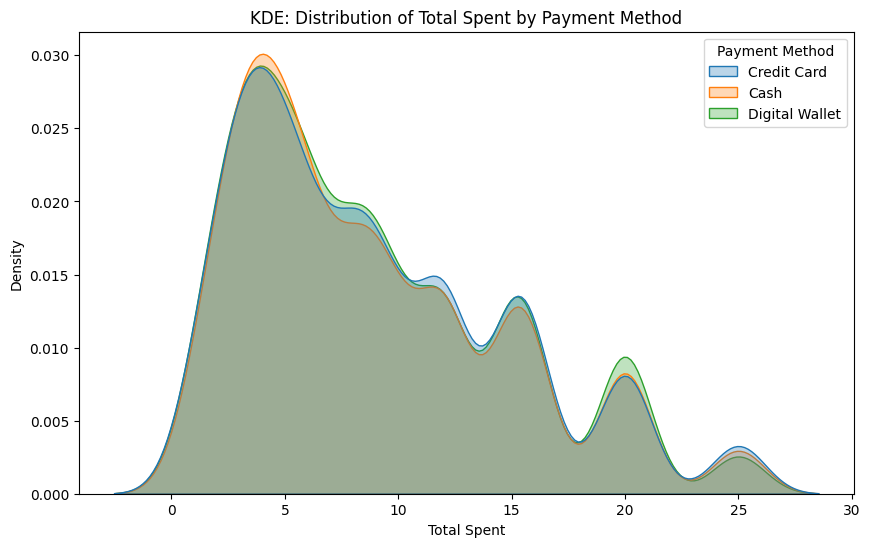

In [86]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='Total Spent', hue='Payment Method', fill=True, alpha=0.3)
plt.title("KDE: Distribution of Total Spent by Payment Method")
plt.show()

In [87]:
data[data['Payment Method'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [88]:
data.head(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,Cake,3.0,3.0,9.0,Digital Wallet,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,Cake,5.0,3.0,15.0,Cash,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Cash,In-store,2023-12-31


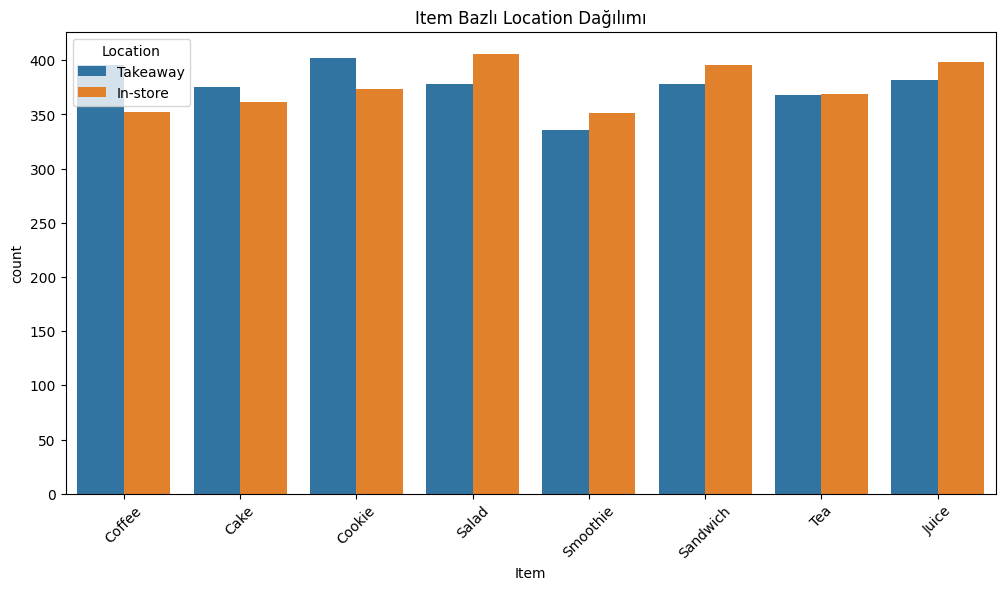

In [89]:

plt.figure(figsize=(12,6))
sns.countplot(x='Item', hue='Location', data=data)
plt.xticks(rotation=45)
plt.title('Item Bazlı Location Dağılımı')
plt.show()

In [90]:
coffeeLocation = data[(data['Item'] == 'Coffee') & data['Location'].notna()]

coffeeLocation_rate= coffeeLocation['Location'].value_counts(normalize=True)
print(coffeeLocation_rate)

Location
Takeaway    0.529412
In-store    0.470588
Name: proportion, dtype: float64


In [91]:
def fill_payment_low(row, probs):
    if pd.notna(row['Location']):
        return row['Location']

    if  row['Item'] == 'Coffee':
        return np.random.choice(probs.index, p=probs.values)

    return row['Location']

data['Location'] = data.apply(lambda row: fill_payment_low(row, coffeeLocation_rate), axis=1)

In [92]:
cakeLocation = data[(data['Item'] == 'Cake') & data['Location'].notna()]

cakeLocation_rate= cakeLocation['Location'].value_counts(normalize=True)
print(cakeLocation_rate)

Location
Takeaway    0.509511
In-store    0.490489
Name: proportion, dtype: float64


In [93]:
def fill_payment_low(row, probs):
    if pd.notna(row['Location']):
        return row['Location']

    if  row['Item'] == 'Cake':
        return np.random.choice(probs.index, p=probs.values)

    return row['Location']

data['Location'] = data.apply(lambda row: fill_payment_low(row, cakeLocation_rate), axis=1)

In [94]:
cookieLocation = data[(data['Item'] == 'Cookie') & data['Location'].notna()]

cookieLocation_rate= cookieLocation['Location'].value_counts(normalize=True)
print(cookieLocation_rate)

Location
Takeaway    0.51871
In-store    0.48129
Name: proportion, dtype: float64


In [95]:
def fill_payment_low(row, probs):
    if pd.notna(row['Location']):
        return row['Location']

    if  row['Item'] == 'Cookie':
        return np.random.choice(probs.index, p=probs.values)

    return row['Location']

data['Location'] = data.apply(lambda row: fill_payment_low(row, cookieLocation_rate), axis=1)

In [96]:
saladLocation = data[(data['Item'] == 'Salad') & data['Location'].notna()]

saladLocation_rate= saladLocation['Location'].value_counts(normalize=True)
print(saladLocation_rate)

Location
In-store    0.517857
Takeaway    0.482143
Name: proportion, dtype: float64


In [97]:
def fill_payment_low(row, probs):
    if pd.notna(row['Location']):
        return row['Location']

    if  row['Item'] == 'Salad':
        return np.random.choice(probs.index, p=probs.values)

    return row['Location']

data['Location'] = data.apply(lambda row: fill_payment_low(row, saladLocation_rate), axis=1)

In [98]:
smoothieLocation = data[(data['Item'] == 'Smoothie') & data['Location'].notna()]

smoothieLocation_rate= smoothieLocation['Location'].value_counts(normalize=True)
print(smoothieLocation_rate)

Location
In-store    0.510917
Takeaway    0.489083
Name: proportion, dtype: float64


In [99]:
def fill_payment_low(row, probs):
    if pd.notna(row['Location']):
        return row['Location']

    if  row['Item'] == 'Smoothie':
        return np.random.choice(probs.index, p=probs.values)

    return row['Location']

data['Location'] = data.apply(lambda row: fill_payment_low(row, smoothieLocation_rate), axis=1)

In [100]:
sandwichLocation = data[(data['Item'] == 'Sandwich') & data['Location'].notna()]

sandwichLocation_rate= sandwichLocation['Location'].value_counts(normalize=True)
print(sandwichLocation_rate)

Location
In-store    0.511628
Takeaway    0.488372
Name: proportion, dtype: float64


In [101]:
def fill_payment_low(row, probs):
    if pd.notna(row['Location']):
        return row['Location']

    if  row['Item'] == 'Sandwich':
        return np.random.choice(probs.index, p=probs.values)

    return row['Location']

data['Location'] = data.apply(lambda row: fill_payment_low(row, sandwichLocation_rate), axis=1)

In [102]:
teaLocation = data[(data['Item'] == 'Tea') & data['Location'].notna()]

teaLocation_rate= teaLocation['Location'].value_counts(normalize=True)
print(teaLocation_rate)

Location
In-store    0.500678
Takeaway    0.499322
Name: proportion, dtype: float64


In [103]:
def fill_payment_low(row, probs):
    if pd.notna(row['Location']):
        return row['Location']

    if  row['Item'] == 'Tea':
        return np.random.choice(probs.index, p=probs.values)

    return row['Location']

data['Location'] = data.apply(lambda row: fill_payment_low(row, teaLocation_rate), axis=1)

In [104]:
juiceLocation = data[(data['Item'] == 'Juice') & data['Location'].notna()]

juiceLocation_rate= juiceLocation['Location'].value_counts(normalize=True)
print(juiceLocation_rate)

Location
In-store    0.510256
Takeaway    0.489744
Name: proportion, dtype: float64


In [105]:
def fill_payment_low(row, probs):
    if pd.notna(row['Location']):
        return row['Location']

    if  row['Item'] == 'Juice':
        return np.random.choice(probs.index, p=probs.values)

    return row['Location']

data['Location'] = data.apply(lambda row: fill_payment_low(row, juiceLocation_rate), axis=1)

In [106]:
data[data['Location'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [107]:
data.head(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Takeaway,2023-03-31
6,TXN_4433211,Cake,3.0,3.0,9.0,Digital Wallet,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,In-store,2023-10-28
8,TXN_4717867,Cake,5.0,3.0,15.0,Cash,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Cash,In-store,2023-12-31


In [108]:
data[data['Transaction Date'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
11,TXN_3051279,Sandwich,2.0,4.0,8.0,Credit Card,Takeaway,NaN
29,TXN_7640952,Cake,4.0,3.0,12.0,Digital Wallet,Takeaway,NaN
33,TXN_7710508,Cookie,5.0,1.0,5.0,Cash,Takeaway,NaN
77,TXN_2091733,Salad,1.0,5.0,5.0,Digital Wallet,In-store,NaN
103,TXN_7028009,Cake,4.0,3.0,12.0,Credit Card,Takeaway,NaN
...,...,...,...,...,...,...,...,...
9933,TXN_9460419,Cake,1.0,3.0,3.0,Cash,Takeaway,NaN
9937,TXN_8253472,Cake,1.0,3.0,3.0,Digital Wallet,Takeaway,NaN
9949,TXN_3130865,Juice,3.0,3.0,9.0,Digital Wallet,In-store,NaN
9983,TXN_9226047,Smoothie,3.0,4.0,12.0,Cash,Takeaway,NaN


In [109]:
data = data.dropna(subset=['Transaction Date'])

In [110]:
data[data['Transaction Date'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [111]:
nan_counts = data.isna().sum()
print(nan_counts)

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [112]:
data_copy=data

In [165]:
x = data[['Item', 'Total Spent', 'Location']]
y = data['Payment Method']

# Train-test bölme
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [177]:
model = RandomForestClassifier(
    n_estimators=200,       # 200 ağaç
    max_depth=None,         # derin ağaçlar
    class_weight='balanced',# dengesiz sınıflar için
    random_state=42
)

In [178]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Item', 'Location'])
    ],
    remainder='passthrough'  # Total Spent olduğu gibi kalsın
)

In [179]:
X_train_encoded = preprocess.fit_transform(x_train)

In [180]:
X_test_encoded = preprocess.transform(x_test)

In [181]:
model.fit(X_train_encoded, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [182]:
y_pred = model.predict(X_test_encoded)

In [168]:
from sklearn.metrics import accuracy_score, classification_report

In [173]:
y_pred = x_test.apply(
    lambda row: predict_payment(row['Item'], row['Total Spent'], row['Location']),
    axis=1
)

In [183]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test doğruluk skoru: {accuracy:.2f}")

Test doğruluk skoru: 0.87


In [184]:
data.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Takeaway,2023-03-31
6,TXN_4433211,Cake,3.0,3.0,9.0,Digital Wallet,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,In-store,2023-10-28
8,TXN_4717867,Cake,5.0,3.0,15.0,Cash,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Cash,In-store,2023-12-31
